In [55]:
import numpy as np
import torch
import torch.nn as nn

In [3]:
X=np.random.rand(1,1,10,10)
W=np.random.rand(1,1,3,3)
b=0

In [50]:
def scratch_convolution(image, kernel,b, st=1, pad=1):
    num_ker, ch_ker, height_ker, width_ker=kernel.shape
    num_img, ch_img, height_img, width_img=image.shape
    p=pad

    out_width=int((width_img-width_ker+2*p)/st+1)
    out_height=int((height_img-height_ker+2*p)/st+1)
    
    image_padded=np.pad(image, ((0,0),(0,0),(1,1),(1,1)), mode='constant')
    
    i0=np.repeat(np.arange(height_ker),width_ker)
    i1=np.repeat(np.arange(height_img),width_img)
    j0=np.tile(np.arange(height_ker),width_ker)
    j1=np.tile(np.arange(height_img),width_img)

    i=i0.reshape(-1,1)+i1.reshape(1,-1)
    j=j0.reshape(-1,1)+j1.reshape(1,-1)
    k=np.repeat(np.arange(ch_ker),height_ker*width_ker).reshape(-1,1)
    
    taken_img=image_padded[:,k,i,j].transpose(1,2,0).reshape(height_ker*width_ker,-1)
    weights=kernel.reshape(1,-1)
    convolve=weights@taken_img+b
    
    out=convolve.reshape(num_img,ch_img,out_height,out_width)
    return out

In [51]:
store= scratch_convolution(X,W,b)
store=np.squeeze(store)

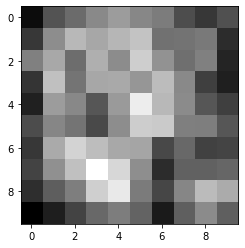

In [52]:
plt.imshow(store, cmap='gray')

In [53]:
def conv3x3(in_ch,out_ch,stride=1):
    return nn.Conv2d(in_ch,out_ch, kernel_size=3, stride=stride, padding=1, bias=False)

In [56]:
class Resblock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.block=nn.Sequential(conv3x3(channels, channels),
                                nn.BatchNorm2d(channels),
                                nn.ReLU(True),
                                conv3x3(channels, channels),
                                nn.BatchNorm2d(channels))
        self.relu=nn.ReLU(inplace=True)

    def forward(self,x):
        identity= x
        print (f'identity {identity}')
        out= self.block(x)
        print (f'initial {out}')
        out += identity
        print (f'final {out}')
        out= self.relu(out)
        
        return out

In [57]:
ress=Resblock(1)
ress

Resblock(
  (block): Sequential(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (relu): ReLU(inplace=True)
)